## PROJECT 2

### Part 1

#### Importing the libraries 

In [1]:
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

/tmp/ipykernel_4588/188893595.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Working with data set project2.data

In [2]:
data = pd.read_csv('project2.data') #imports the project.data and reads it as a csv
data #shows the data frame

class    age menopause tumor-size inv-nodes node-caps  \
0    no-recurrence-events  30-39   premeno      30-34       0-2        no   
1    no-recurrence-events  40-49   premeno      20-24       0-2        no   
2    no-recurrence-events  40-49   premeno      20-24       0-2        no   
3    no-recurrence-events  60-69      ge40      15-19       0-2        no   
4    no-recurrence-events  40-49   premeno        0-4       0-2        no   
..                    ...    ...       ...        ...       ...       ...   
281     recurrence-events  30-39   premeno      30-34       0-2        no   
282     recurrence-events  30-39   premeno      20-24       0-2        no   
283     recurrence-events  60-69      ge40      20-24       0-2        no   
284     recurrence-events  40-49      ge40      30-34       3-5        no   
285     recurrence-events  50-59      ge40      30-34       3-5        no   

     deg-malig breast breast-quad irradiat  
0            3   left    left_low       no  
1            2  right    right_up       no  
2            2   left    left_low       no  
3            2  right     left_up       no  
4            2  right   right_low       no  
..         ...    ...         ...      ...  
281          2   left     left_up       no  
282          3   left     left_up      yes  
283          1  right     left_up       no  
284          3   left    left_low       no  
285          3   left    left_low       no  

[286 rows x 10 columns]

#### Identifing the shape and size of the raw data

To Identify the shape and the size of the raw data we will be using the pandas library. The build in function shape and for the size we will be using checking the lenght of the data

In [3]:
data.shape #identify the shape 

(286, 10)

In [4]:
len(data) #Identify the size of the raw data 

286

In [5]:
data.size

2860

#### Get information about the types of data and check if it needs any datatype conversion

In [6]:
data.info() #gets information about the dtype of each column in the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


#### Dropping non-important columns if needed, Is the data missing in any of the columns?

From what I am able to see all the columns are important in the data as there are no duplicates or non value columns 

In [7]:
data.isnull().sum() #checking for missing values

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

As I can see above it indicates that there are no missing values, although that indicates that we are ready to go when i took a look at the dataframe i noticed that there were missing values and this values needed to be replace with nan values

In [8]:
data = data.replace(["", "?", "NA"], np.nan)

In [9]:
data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [10]:
data['node-caps'].fillna(data['node-caps'].mode()[0],inplace=True) #this really runs need to run it twice

/tmp/ipykernel_4588/3856421471.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['node-caps'].fillna(data['node-caps'].mode()[0],inplace=True) #this really runs need to run it twice


In [11]:
data['breast-quad'].fillna(data['breast-quad'].mode()[0],inplace=True) #this really runs need to run it twice

/tmp/ipykernel_4588/95693027.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['breast-quad'].fillna(data['breast-quad'].mode()[0],inplace=True) #this really runs need to run it twice


#### Univariate Analysis

<Axes: xlabel='age', ylabel='Count'>

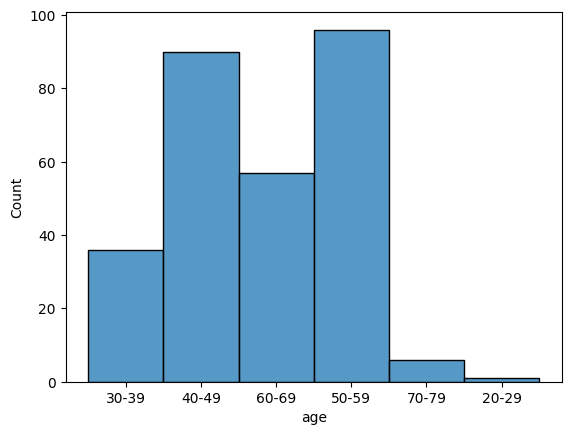

In [12]:
sns.histplot(data=data['age'])

<Axes: xlabel='tumor-size', ylabel='Count'>

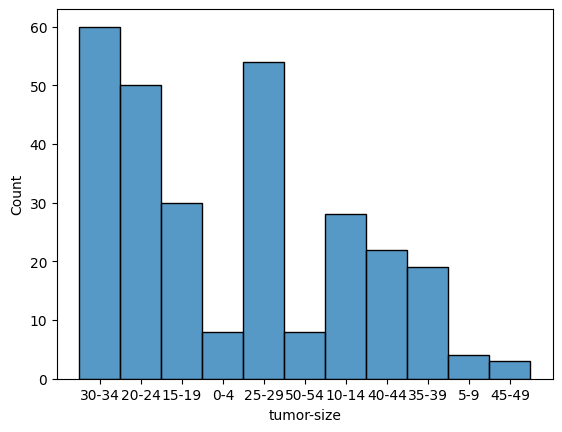

In [13]:
sns.histplot(data=data['tumor-size'])

<Axes: xlabel='breast-quad', ylabel='Count'>

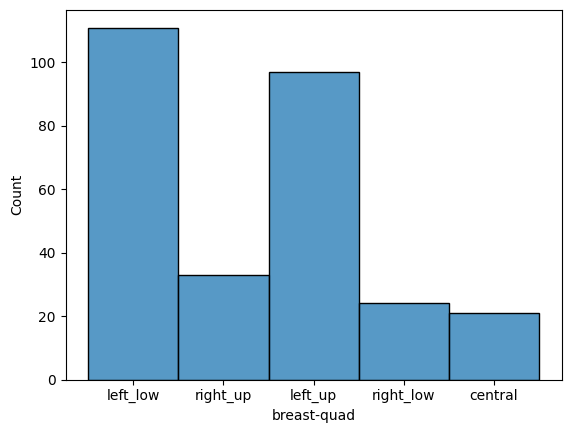

In [14]:
sns.histplot(data=data['breast-quad'])

<Axes: xlabel='breast', ylabel='count'>

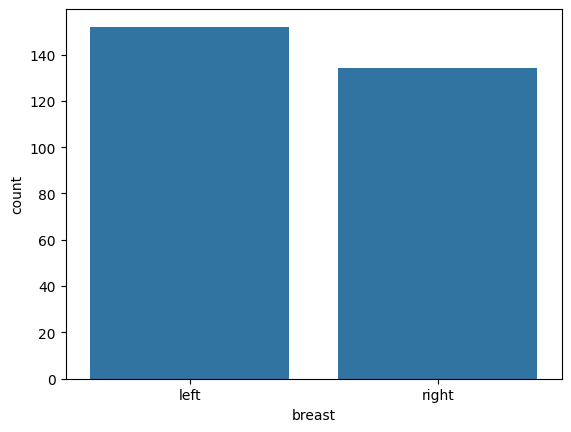

In [15]:
sns.countplot(x=data['breast'])

<Axes: xlabel='menopause', ylabel='Count'>

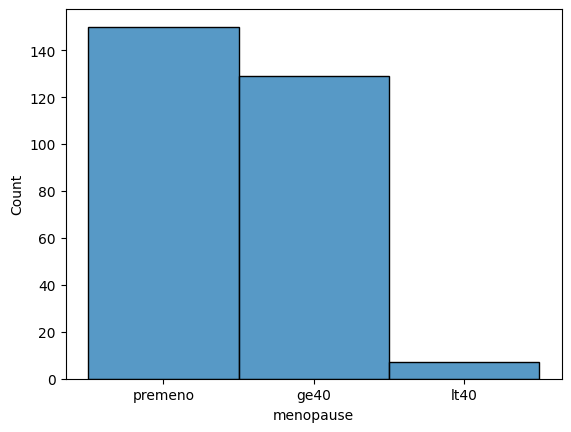

In [16]:
sns.histplot(data=data['menopause'])

<Axes: xlabel='irradiat', ylabel='count'>

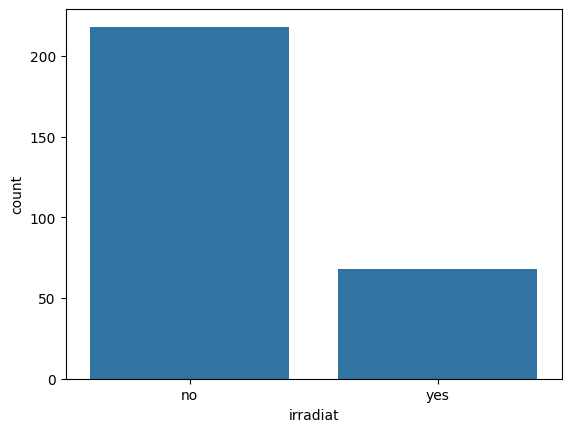

In [17]:
sns.countplot(x=data['irradiat'])

<Axes: xlabel='node-caps', ylabel='count'>

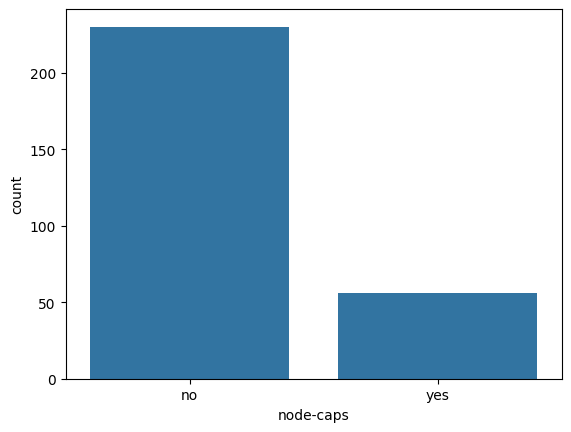

In [18]:
sns.countplot(x=data['node-caps'])

<Axes: xlabel='class', ylabel='count'>

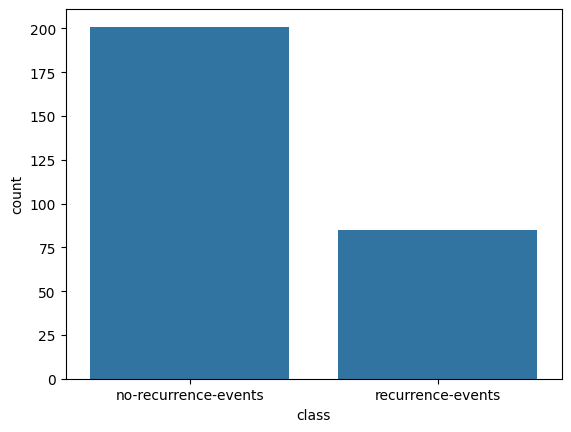

In [19]:
sns.countplot(x=data['class'])

<Axes: xlabel='deg-malig'>

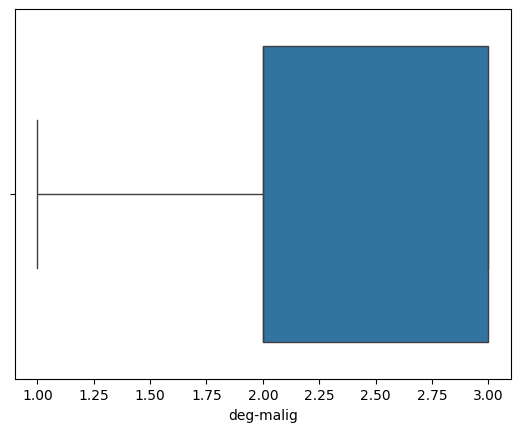

In [20]:
sns.boxplot(data=data, x='deg-malig')

#### One hot encoding

In [21]:
data['class'] = data['class'].astype("category")
data['age'] = data['age'].astype("category")
data['menopause'] = data['menopause'].astype("category")
data['tumor-size'] = data['tumor-size'].astype("category")
data['inv-nodes'] = data['inv-nodes'].astype("category")
data['node-caps'] = data['node-caps'].astype("category")
data['breast'] = data['breast'].astype("category")
data['breast-quad'] = data['breast-quad'].astype("category")
data['irradiat'] = data['irradiat'].astype("category")
data = pd.get_dummies(data, columns=['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 'breast', 'breast-quad', 'irradiat'], drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   deg-malig                286 non-null    int64
 1   class_recurrence-events  286 non-null    bool 
 2   age_30-39                286 non-null    bool 
 3   age_40-49                286 non-null    bool 
 4   age_50-59                286 non-null    bool 
 5   age_60-69                286 non-null    bool 
 6   age_70-79                286 non-null    bool 
 7   menopause_lt40           286 non-null    bool 
 8   menopause_premeno        286 non-null    bool 
 9   tumor-size_10-14         286 non-null    bool 
 10  tumor-size_15-19         286 non-null    bool 
 11  tumor-size_20-24         286 non-null    bool 
 12  tumor-size_25-29         286 non-null    bool 
 13  tumor-size_30-34         286 non-null    bool 
 14  tumor-size_35-39         286 non-null    bool 
 15  tumor-

### Part 2

#### Spliting the dataset into Training and Test sets


In [22]:
data

deg-malig  class_recurrence-events  age_30-39  age_40-49  age_50-59  \
0            3                    False       True      False      False   
1            2                    False      False       True      False   
2            2                    False      False       True      False   
3            2                    False      False      False      False   
4            2                    False      False       True      False   
..         ...                      ...        ...        ...        ...   
281          2                     True       True      False      False   
282          3                     True       True      False      False   
283          1                     True      False      False      False   
284          3                     True      False       True      False   
285          3                     True      False      False       True   

     age_60-69  age_70-79  menopause_lt40  menopause_premeno  \
0        False      False           False               True   
1        False      False           False               True   
2        False      False           False               True   
3         True      False           False              False   
4        False      False           False               True   
..         ...        ...             ...                ...   
281      False      False           False               True   
282      False      False           False               True   
283       True      False           False              False   
284      False      False           False              False   
285      False      False           False              False   

     tumor-size_10-14  ...  inv-nodes_3-5  inv-nodes_6-8  inv-nodes_9-11  \
0               False  ...          False          False           False   
1               False  ...          False          False           False   
2               False  ...          False          False           False   
3               False  ...          False          False           False   
4               False  ...          False          False           False   
..                ...  ...            ...            ...             ...   
281             False  ...          False          False           False   
282             False  ...          False          False           False   
283             False  ...          False          False           False   
284             False  ...           True          False           False   
285             False  ...           True          False           False   

     node-caps_yes  breast_right  breast-quad_left_low  breast-quad_left_up  \
0            False         False                  True                False   
1            False          True                 False                False   
2            False         False                  True                False   
3            False          True                 False                 True   
4            False          True                 False                False   
..             ...           ...                   ...                  ...   
281          False         False                 False                 True   
282          False         False                 False                 True   
283          False          True                 False                 True   
284          False         False                  True                False   
285          False         False                  True                False   

     breast-quad_right_low  breast-quad_right_up  irradiat_yes  
0                    False                 False         False  
1                    False                  True         False  
2                    False                 False         False  
3                    False                 False         False  
4                     True                 False         False  
..                     ...                   ...           ...  
281   

In [23]:
X = data.drop(['class_recurrence-events'], axis=1)  
y = data['class_recurrence-events'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (200, 31)
X_test shape: (86, 31)
y_train shape: (200,)
y_test shape: (86,)
